#Pokemon with stats

##About this dataset

This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

The feature of this data is:

#: ID for each pokemon
. Name: Name of each pokemon

. Type 1: Each pokemon has a type, this determines weakness/resistance to attacks

. Type 2: Some pokemon are dual type and have 2

. Total: sum of all stats that come after this, a general guide to how strong a pokemon is

. HP: hit points, or health, defines how much damage a pokemon can withstand before fainting

. Attack: the base modifier for normal attacks (eg. Scratch, Punch)

. Defense: the base damage resistance against normal attacks

. SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

. SP Def: the base damage resistance against special attacks

. Speed: determines which pokemon attacks first each round

**Feel free to** [download dataset](https://www.kaggle.com/abcsds/pokemon) **from Kaggle**

##Objective


1. The Pokemon Legendary have Attack and Defense respectively more than its average  
2. Find the criteria of the pokemon Legendary based on some features in dataset

##Get the dataset

We'll use the opendatasets library to download the data from Kaggle directly within Jupyter or google colab. Let's install and import opendatasets.

In [59]:
!pip install opendatasets --upgrade --quiet

In [60]:
import opendatasets as od

In [61]:
od.version()

'0.1.20'

The dataset can now be downloaded using od.download. When you execute od.download, you will be asked to provide your Kaggle username and API key. Follow these instructions to create an API key: http://bit.ly/kaggle-creds

In [62]:
dataset_url = 'https://www.kaggle.com/abcsds/pokemon'

In [63]:
od.download(dataset_url)

Skipping, found downloaded files in "./pokemon" (use force=True to force download)


Once the above command is executed, the dataset is downloaded and extracted to the directory pokemon

In [64]:
data = './pokemon/Pokemon.csv'

import library pandas and numpy

In [65]:
import pandas as pd
import numpy as np

Let's load the data from Pokemon.csv using Pandas.

In [66]:
dataset = pd.read_csv(data)

#print five top data 
dataset.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [67]:
dataset.shape

(800, 13)

In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


dataset.info() is used to inform all features in dataset, number of rows, data type and also we can check missing values

In [69]:
# Copy dataset we wwill used to clean the data
# Keep original of data 
df = dataset.copy()

In [70]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


##Handling missing Values

Check Missing Values in dataset

In [71]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Type 2 has missing 386 values almost to 50% from the data

In [72]:
# Check all data unique in column of Type 2
print(df['Type 2'].unique())
print('-'*100)
print(df['Type 2'].nunique())

['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']
----------------------------------------------------------------------------------------------------
18


Some values in Type 2 are NaN and thus they have to be filled or deleted


In [73]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

We fillna with coressponding values of Type 1 with assuming Type 2 == Type 1 if data is null

In [74]:
df['Type 2'].fillna(df['Type 1'], inplace=True)

In [75]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


In [76]:
print(df['Type 2'].unique())
print('-'*100)
print(df['Type 2'].nunique())

['Poison' 'Fire' 'Flying' 'Dragon' 'Water' 'Bug' 'Normal' 'Electric'
 'Ground' 'Fairy' 'Grass' 'Fighting' 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark'
 'Ghost']
----------------------------------------------------------------------------------------------------
18


##Manipulating Columns

Rename Type 1 and Type 2 with Type_1 and Type_2 respectively to make it eaiser to manipulating the data

In [77]:
df = df.rename(columns={'Type 1': 'Type_1', 'Type 2': 'Type_2', 'Sp. Atk': 'Special_Atk', 'Sp. Def': "Special_Def"})
df.head()

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Special_Atk,Special_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


In [78]:
# Check value of column Generation
df["Generation"].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

Drop '#' columns and set 'Name' as index

In [79]:
df = df.drop(['#'], axis=1).set_index("Name")
df.head()

,Type_1,Type_2,Total,HP,Attack,Defense,Special_Atk,Special_Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


In [80]:
df['Generation'] = df["Generation"].astype('category')

In [81]:
df['Generation'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6], ordered=False)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, Bulbasaur to Volcanion
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Type_1       800 non-null    object  
 1   Type_2       800 non-null    object  
 2   Total        800 non-null    int64   
 3   HP           800 non-null    int64   
 4   Attack       800 non-null    int64   
 5   Defense      800 non-null    int64   
 6   Special_Atk  800 non-null    int64   
 7   Special_Def  800 non-null    int64   
 8   Speed        800 non-null    int64   
 9   Generation   800 non-null    category
 10  Legendary    800 non-null    bool    
dtypes: bool(1), category(1), int64(7), object(2)
memory usage: 64.3+ KB


##Data Query

Before we query the data we can check data.describe() as parameter to query the data

In [83]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.0,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.0,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.0,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.0,230.0
Special_Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.0,194.0
Special_Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.0,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.0,180.0


In [84]:
# using query the data
df_legendary = df[(df["Legendary"]==True)]

In [85]:
df_legendary.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total,65.0,637.384615,60.937389,580.0,580.0,600.0,680.0,780.0
HP,65.0,92.738462,21.722164,50.0,80.0,91.0,105.0,150.0
Attack,65.0,116.676923,30.348037,50.0,100.0,110.0,131.0,190.0
Defense,65.0,99.661538,28.255131,20.0,90.0,100.0,115.0,200.0
Special_Atk,65.0,122.184615,31.104608,50.0,100.0,120.0,150.0,194.0
Special_Def,65.0,105.938462,28.827004,20.0,90.0,100.0,120.0,200.0
Speed,65.0,100.184615,22.952323,50.0,90.0,100.0,110.0,180.0


Number of the Pokemon Legendary are 65 pokemons

In [86]:
# Pokemon Legendary have Attack and Defense more than average of dataset
df_1 = df[(df["Legendary"]==True) & (df["Attack"]>= df["Attack"].mean()) & (df["Defense"]>= df["Defense"].mean())]

In [87]:
# Number Pokemon Legendary have Attack and Defense more than its average
sum_pokemon_legendary = 0

for i in range(len(df_1)):
  sum_pokemon_legendary += 1

print(sum_pokemon_legendary)

50


In [88]:
'''we also used to value_count() to count of
Number Pokemon Legendary have Attack and Defense
more than its average'''

df_1['Legendary'].value_counts()

True    50
Name: Legendary, dtype: int64

Number of the Pokemon Legendary have Attack and Defense respectively more than its average are 50 pokemons

In [89]:
# Filter data using Query syntax

df_generation_six_legendary = df.query("Legendary==True and Generation==6")
df_generation_six_legendary[['Type_1', 'Type_2']]

,Type_1,Type_2
Name,,
Xerneas,Fairy,Fairy
Yveltal,Dark,Flying
Zygarde50% Forme,Dragon,Ground
Diancie,Rock,Fairy
DiancieMega Diancie,Rock,Fairy
HoopaHoopa Confined,Psychic,Ghost
HoopaHoopa Unbound,Psychic,Dark
Volcanion,Fire,Water


In [90]:
df_generation_first_legendary = df.query("Legendary==True and Generation==1")
df_generation_first_legendary[['Type_1', 'Type_2']]

,Type_1,Type_2
Name,,
Articuno,Ice,Flying
Zapdos,Electric,Flying
Moltres,Fire,Flying
Mewtwo,Psychic,Psychic
MewtwoMega Mewtwo X,Psychic,Fighting
MewtwoMega Mewtwo Y,Psychic,Psychic


In [91]:
df_generation_six_legendary.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total,8.0,642.500,45.903626,600.0,600.00,640.0,680.00,700.0
HP,8.0,87.500,30.156733,50.0,72.50,80.0,112.50,126.0
Attack,8.0,125.250,24.557513,100.0,107.50,120.5,138.25,160.0
Defense,8.0,101.375,30.881976,60.0,86.25,102.5,120.25,150.0
Special_Atk,8.0,131.625,29.717419,81.0,122.50,131.0,152.50,170.0
Special_Def,8.0,112.625,21.573380,90.0,97.25,104.0,130.00,150.0
Speed,8.0,84.125,20.038802,50.0,70.00,87.5,99.00,110.0


In [92]:
df_generation_first_legendary.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total,6.0,663.333333,98.319208,580.0,580.00,630.0,755.0,780.0
HP,6.0,98.000000,8.763561,90.0,90.00,98.0,106.0,106.0
Attack,6.0,120.833333,41.038600,85.0,92.50,105.0,140.0,190.0
Defense,6.0,89.166667,11.143010,70.0,86.25,90.0,97.5,100.0
Special_Atk,6.0,141.166667,33.984801,95.0,125.00,139.5,154.0,194.0
Special_Def,6.0,101.666667,16.931233,85.0,90.00,95.0,115.0,125.0
Speed,6.0,112.500000,23.611438,85.0,92.50,115.0,130.0,140.0


Pokemon Legendary which 5th Generation have average 

##Grouping and Aggreating

In [93]:
#1 grouping by Generation and Legendary
df_nth_generation = df.groupby(['Generation', 'Legendary'])

df_nth_generation.count()

Type_1  Type_2  Total  ...  Special_Atk  Special_Def  Speed
Generation Legendary                         ...                                 
1          False         160     160    160  ...          160          160    160
           True            6       6      6  ...            6            6      6
2          False         101     101    101  ...          101          101    101
           True            5       5      5  ...            5            5      5
3          False         142     142    142  ...          142          142    142
           True           18      18     18  ...           18           18     18
4          False         108     108    108  ...          108          108    108
           True           13      13     13  ...           13           13     13
5          False         150     150    150  ...          150          150    150
           True           15      15     15  ...           15           15     15
6          False          74      74     74  ...           74           74     74
           True            8       8      8  ...            8            8      8

[12 rows x 9 columns]

In [94]:
#2 grouping by type 1 and type 2 of pokemons with count pokemon generation
df_type = df.groupby(['Type_1', 'Type_2', 'Generation'])['Generation']

df_type.count()

Type_1  Type_2  Generation
Bug     Bug     1              3
                2              1
                3              5
                4              3
                5              3
                              ..
Water   Water   2              7
                3             12
                4              9
                5              8
                6              4
Name: Generation, Length: 1944, dtype: int64

In [95]:
#3 Combine grouping Legendary and types of pokemon

df_type_legendary = df.groupby(['Legendary' ,'Type_1', 'Type_2'])

df_type_legendary.count()

Total  HP  Attack  ...  Special_Def  Speed  Generation
Legendary Type_1 Type_2                       ...                                
False     Bug    Bug          17  17      17  ...           17     17          17
                 Electric      2   2       2  ...            2      2           2
                 Fighting      2   2       2  ...            2      2           2
                 Fire          2   2       2  ...            2      2           2
                 Flying       14  14      14  ...           14     14          14
...                          ...  ..     ...  ...          ...    ...         ...
True      Steel  Fighting      1   1       1  ...            1      1           1
                 Psychic       1   1       1  ...            1      1           1
                 Steel         1   1       1  ...            1      1           1
          Water  Dragon        1   1       1  ...            1      1           1
                 Water         3   3       3  ...            3      3           3

[180 rows x 8 columns]

In [96]:
# Combine grouping and aggregation by max and min from each generation and Legendary pokemons
df_nth_generation['Attack', 'Defense'].agg(['max', 'min'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Attack      Defense    
                        max  min     max min
Generation Legendary                        
1          False        155    5     180   5
           True         190   85     100  70
2          False        185   10     230  10
           True         130   75     130  75
3          False        165   15     230  20
           True         180   50     200  20
4          False        170    5     168   5
           True         160   75     130  70
5          False        147   25     145  30
           True         170   90     129  70
6          False        150   22     184  33
           True         160  100     150  60

In [97]:
# Combine grouping and aggregation by max, min and count to Special Attackand Specila Defense from each generation and Legendary pokemons

df_nth_generation['Special_Atk', 'Special_Def'].agg(['max', 'min', 'count'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Special_Atk           Special_Def          
                             max min count         max min count
Generation Legendary                                            
1          False             175  15   160         130  20   160
           True              194  95     6         125  85     6
2          False             165  10   101         230  20   101
           True              115  90     5         154  75     5
3          False             165  10   142         135  20   142
           True              180  50    18         200  20    18
4          False             140  10   108         150  30   108
           True              150  75    13         130  70    13
5          False             145  15   150         135  25   150
           True              170  72    15         129  72    15
6          False             150  27    74         154  25    74
           True              170  81     8         150  90     8

In [98]:
# Grouping Legendary, Type 1 and Type 2 then aggregation Total by sum 
df_type_legendary['Total'].agg(['sum'])

sum
Legendary Type_1 Type_2        
False     Bug    Bug       4925
                 Electric   791
                 Fighting  1100
                 Fire       910
                 Flying    5873
...                         ...
True      Steel  Fighting   580
                 Psychic    600
                 Steel      580
          Water  Dragon     680
                 Water     2020

[180 rows x 1 columns]

##Visualization

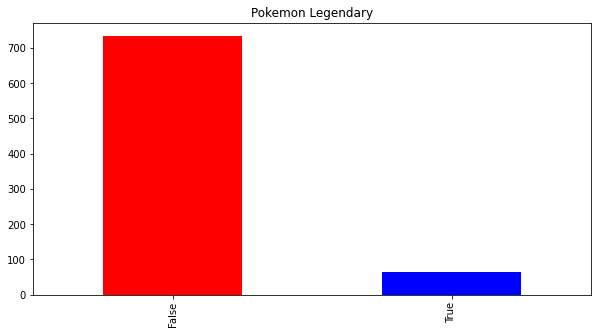

In [99]:
df_legendary_or_non = df["Legendary"]
df_legendary_or_non_count = df_legendary_or_non.value_counts()
df_legendary_or_non_count.plot(kind='bar', color=['r', 'b'], figsize=[10, 5], title='Pokemon Legendary')

Number of pokemons Non-Legendary more than Legendary


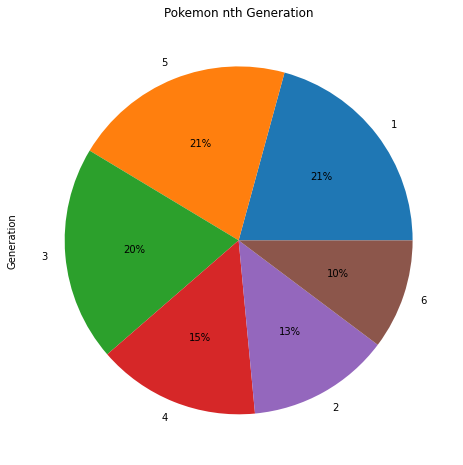

In [100]:
df_generation = df['Generation']
df_generation = df_generation.value_counts()
df_generation.plot(kind='pie', figsize=[16, 8], autopct='%1.0f%%', title='Pokemon nth Generation')

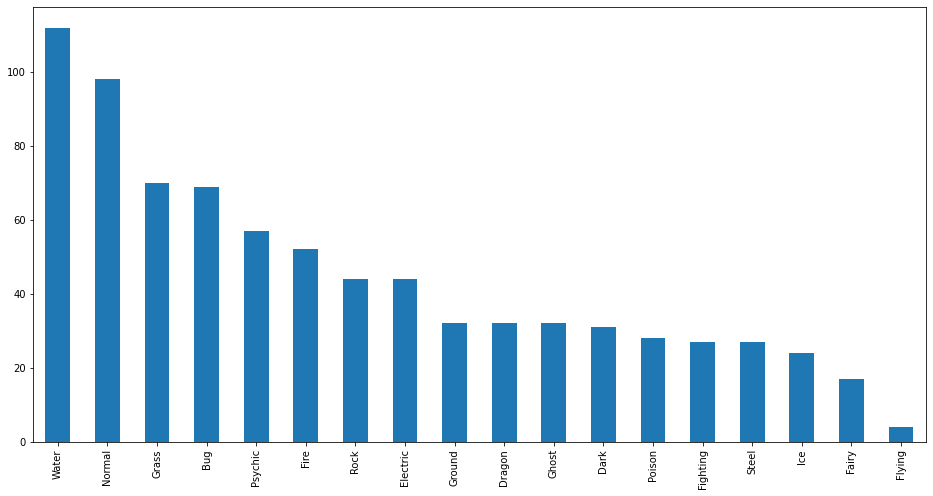

In [101]:
df_type = df['Type_1']
df_type = df_type.value_counts()
df_type.plot(kind='bar', figsize=[16, 8])

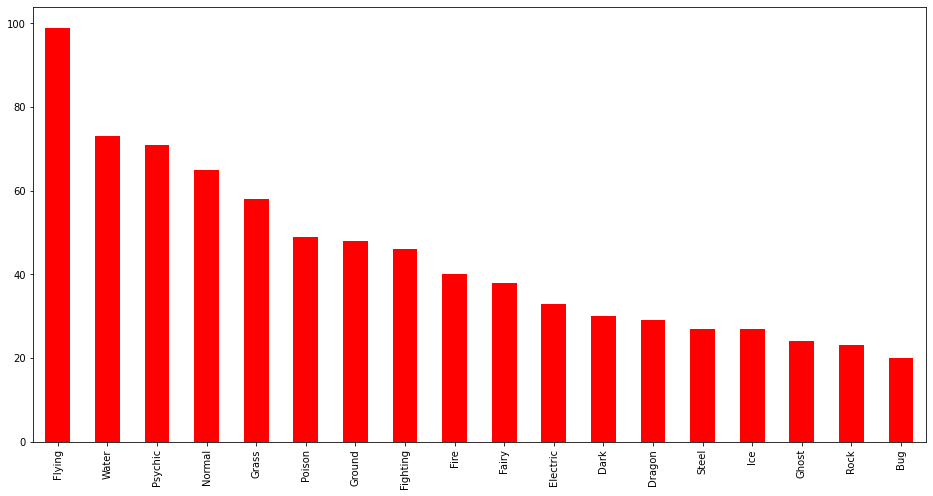

In [102]:
df_type = df['Type_2']
df_type = df_type.value_counts()
df_type.plot(kind='bar', color='r', figsize=[16, 8])

##Conclusion and Result


1. Majority The Pokemon Legendary are 50 pokemons have Attack and Defense respectively more than its average from total pokemon legendary are 65 pokemons

2. The pokemon Legendary have min 'Total' all stats is 580, 'HP' is 50, and it have average 'Attack', 'Defense', 'Special_Att', 'Special_Def', and 'Speed' are 117, 97, 122, 105, and 100 respectively *

Note : 

* : df_legendary.describe().transpose()